In [5]:
import lightgbm
print(lightgbm.__version__)

3.1.1


LightGBM 적용 - 위스콘신 Breast Cancer Precision

In [6]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings

In [7]:
# 데이터 가져오기
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
# 전체 데이터 8:2로 나누기
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

from lightgbm import LGBMClassifier
evals = [(X_test, y_test)]

# 앞서 XGBoost와 동일하게 n_estimators는 400설정.
lgbm = LGBMClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)

lgbm.fit(X_train, y_train, early_stopping_rounds=30, eval_set=evals, eval_metric='logloss', verbose=True)

lgbm_preds = lgbm.predict(X_test)
lgbm_preds_proba = lgbm.predict_proba(X_test)[:,1]

[1]	valid_0's binary_logloss: 0.564404
Training until validation scores don't improve for 30 rounds
[2]	valid_0's binary_logloss: 0.50675
[3]	valid_0's binary_logloss: 0.45778
[4]	valid_0's binary_logloss: 0.417202
[5]	valid_0's binary_logloss: 0.384942
[6]	valid_0's binary_logloss: 0.355527
[7]	valid_0's binary_logloss: 0.329241
[8]	valid_0's binary_logloss: 0.30713
[9]	valid_0's binary_logloss: 0.287574
[10]	valid_0's binary_logloss: 0.269221
[11]	valid_0's binary_logloss: 0.253956
[12]	valid_0's binary_logloss: 0.239345
[13]	valid_0's binary_logloss: 0.226813
[14]	valid_0's binary_logloss: 0.215581
[15]	valid_0's binary_logloss: 0.205598
[16]	valid_0's binary_logloss: 0.197134
[17]	valid_0's binary_logloss: 0.189619
[18]	valid_0's binary_logloss: 0.183626
[19]	valid_0's binary_logloss: 0.174836
[20]	valid_0's binary_logloss: 0.17001
[21]	valid_0's binary_logloss: 0.165778
[22]	valid_0's binary_logloss: 0.160957
[23]	valid_0's binary_logloss: 0.156928
[24]	valid_0's binary_logloss: 0

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
                                precision_score, recall_score, f1_score, roc_auc_score

In [10]:
# 평가 사용자 함수를 이용한 평가
def get_clf_eval (y_test, pred, pred_proba):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    f1=f1_score(y_test,pred)
    roc_auc=roc_auc_score(y_test,pred_proba)
    
    print('오차행렬\n')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, f1 score : {3:.4f}, AUC score : {4:.4f}'\
            .format(accuracy,precision,recall,f1,roc_auc))

In [11]:
get_clf_eval(y_test, lgbm_preds, lgbm_preds_proba)

오차행렬

[[33  4]
 [ 1 76]]
정확도 : 0.9561, 정밀도 : 0.9500, 재현율 : 0.9870, f1 score : 0.9682, AUC score : 0.9937


In [12]:
for  i, name in enumerate(dataset.feature_names):
    print(i, name)

0 mean radius
1 mean texture
2 mean perimeter
3 mean area
4 mean smoothness
5 mean compactness
6 mean concavity
7 mean concave points
8 mean symmetry
9 mean fractal dimension
10 radius error
11 texture error
12 perimeter error
13 area error
14 smoothness error
15 compactness error
16 concavity error
17 concave points error
18 symmetry error
19 fractal dimension error
20 worst radius
21 worst texture
22 worst perimeter
23 worst area
24 worst smoothness
25 worst compactness
26 worst concavity
27 worst concave points
28 worst symmetry
29 worst fractal dimension


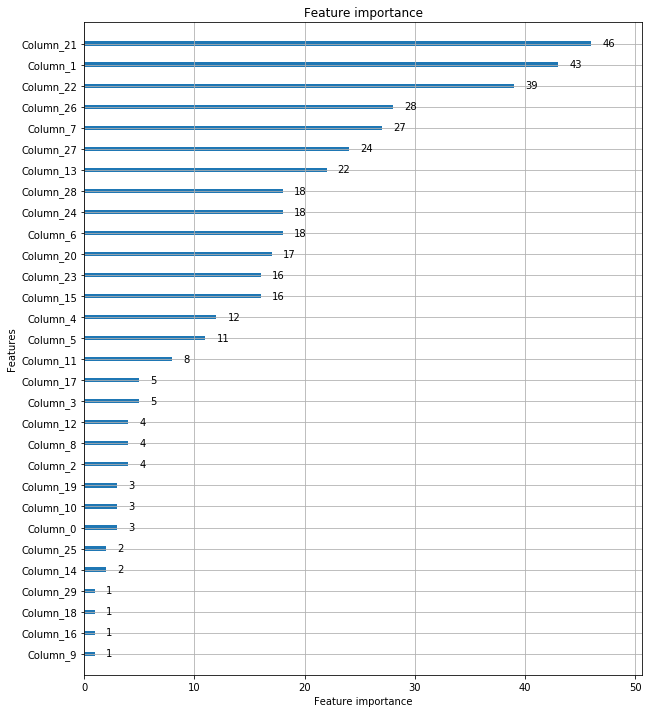

In [14]:
# plot_importance( )를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm, ax=ax)